### This script is used to compress image with JPEG standard, which is implemented by myself.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

((4032, 2268, 3), (400, 240))


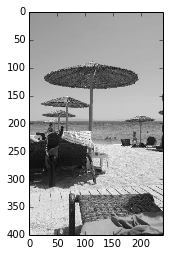

In [60]:
%matplotlib inline
img = cv2.imread('test1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (240, 400))
print(img.shape, gray.shape)
plt.imshow(gray, cmap='gray')

#### Part 1: Do a basic implementation of JPEG:

1. Divide the image into non-overlapping 8x8 blocks.
2. Compute the DCT (discrete cosine transform) of each block. This is implemented in popular packages such as Matlab.
3. Quantize each block. You can do this using the tables in the video or simply divide each coefficient by N, round the result to the nearest integer, and multiply back by N. Try for different values of N.
4. You can also try preserving the 8 largest coefficients (out of the total of 8x8=64), and simply rounding them to the closest integer.
5. Visualize the results after inverting the quantization and the DCT.

In [26]:
# 1. Divide the image into non-overlapping 8x8 blocks.
def split_into_8x8(img):
    w, h = img.shape
    num_bw, num_bh = int(w/8), int(h/8)
    x_idxs = range(num_bw)
    y_idxs = range(num_bh)
    blocks = []
    for x in x_idxs:
        for y in y_idxs:
            blocks.append([x*8,y*8,(x+1)*8,(y+1)*8])
    return blocks      

In [27]:
blocks = split_into_8x8(gray)
print(len(blocks))
print(blocks[-1])

1500
[392, 232, 400, 240]


(8, 8)


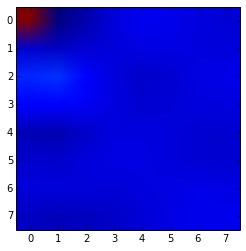

In [55]:
# 2. compute the DCT
# for block in blocks:
idx = 700
block = blocks[idx]
# plt.imshow(gray[x:x1,y:y1])
def compute_dct4block(gray, block):
    x,y,x1,y1 = block
    area = gray[x:x1,y:y1]
    block_dct = cv2.dct(np.array(area, np.float32))
    return block_dct
block_dct = compute_dct(gray, block)
print(block_dct.shape)
plt.imshow(block_dct)

In [71]:
# 3. quantize each block
def quantize_block(area, N=16):
    return ((area/N).astype(int)*N).astype(float)

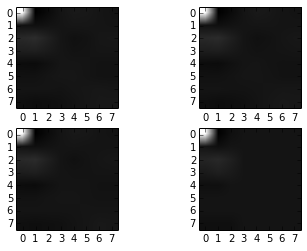

In [52]:
%matplotlib inline
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(block_dct, cmap='gray')
ax[0,1].imshow(quantize_block(block_dct, N=4), cmap='gray')
ax[1,0].imshow(quantize_block(block_dct, N=8), cmap='gray')
ax[1,1].imshow(quantize_block(block_dct, N=32), cmap='gray')
plt.show()

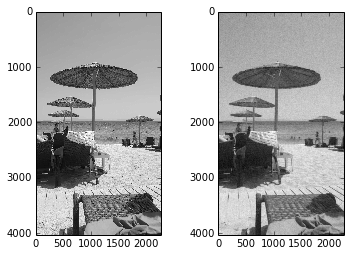

In [87]:
# 4. You can also try preserving the 8 largest coefficients (out of the total of 8x8=64), and simply rounding them to the closest integer.
# 5. Visualize the results after inverting the quantization and the DCT.

img1 = cv2.imread('test1.jpg', 0)
img1 = img1.astype('float')
img_dct = cv2.dct(img1)
img_dct = quantize_block(img_dct, N=128)
img_recover = cv2.idct(img_dct)
cv2.imwrite('re_128_full.png', img_recover)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1, cmap='gray')
# ax[1].imshow(img_dct, cmap='gray')
ax[1].imshow(img_recover, cmap='gray')

plt.show()

In [97]:
def dct(img1):
    img_dct = cv2.dct(img1)
    img_dct = quantize_block(img_dct, N=16)
    img_recover = cv2.idct(img_dct)
    return img_recover

#### Part 2: Repeat the above but instead of using the DCT, use the FFT (Fast Fourier Transform).

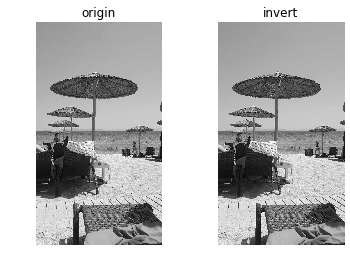

In [96]:
img1 = cv2.imread('test1.jpg', 0)
img1 = img1.astype('float')

def fft(img1):
    f = np.fft.fft2(img1)
    fshift = np.fft.fftshift(f)
    result = 20*np.log(np.abs(fshift))

    ishift = np.fft.ifftshift(fshift)
    iimg = np.fft.ifft2(ishift)
    iimg = np.abs(iimg)
    return iimg

iimg = fft(img1)

plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.title('origin')
plt.axis('off')

plt.subplot(122)
plt.imshow(iimg, cmap='gray')
plt.title('invert')
plt.axis('off')

# plt.subplot(123)
# plt.imshow(result, cmap='gray')
# plt.title('result')
# plt.axis('off')
cv2.imwrite('fft.png', iimg)
plt.show()

#### Part 3: Repeat the above JPEG-type compression but don’t use any transform, simply perform quantization on the original image.

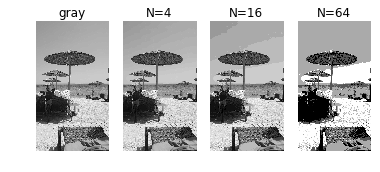

In [95]:
img1 = cv2.imread('test1.jpg', 0)
# img1 = img1.astype('float')
# imshow(quantize_block(block_dct, N=4), cmap='gray')
plt.subplot(141)
plt.imshow(img1, cmap='gray')
plt.title('gray')
plt.axis('off')

plt.subplot(142)
plt.imshow(quantize_block(img1, N=4), cmap='gray')
plt.title('N=4')
plt.axis('off')


plt.subplot(143)
plt.imshow(quantize_block(img1, N=16), cmap='gray')
plt.title('N=16')
plt.axis('off')

plt.subplot(144)
plt.imshow(quantize_block(img1, N=64), cmap='gray')
plt.title('N=64')
plt.axis('off')

plt.show()

#### Part 4: Do JPEG now for color images. In Matlab, use the rgb2ycbcr command to convert the Red-Green-Blue image to a Lumina and Chroma one; then perform the JPEG-style compression on each one of the three channels independently. After inverting the compression, invert the color transform and visualize the result. While keeping the compression ratio constant for the Y channel, increase the compression of the two chrominance channels and observe the results.

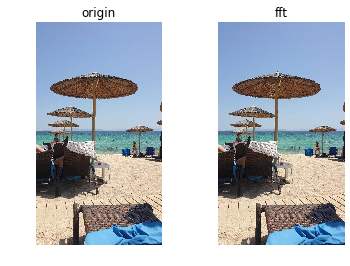

In [106]:
im = cv2.imread('test1.jpg')
print(im.shape, im.dtype)

im0 = fft(im[:,:,0])
im1 = fft(im[:,:,1])
im2 = fft(im[:,:,2])
# print(im0.shape)
im_fft = np.zeros(im.shape)
im_fft[:,:,0] = im0
im_fft[:,:,1] = im1
im_fft[:,:,2] = im2

plt.subplot(121)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('origin')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(im_fft.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('fft')
plt.axis('off')

plt.show()

#### Part 5: Compute the histogram of a given image and of its prediction errors. If the
1. pixel being processed is at coordinate (0,0), consider
2. predicting based on just the pixel at (-1,0);
3. predicting based on just the pixel at (0,1);
4. predicting based on the average of the pixels at (-1,0), (-1,1), and (0,1).

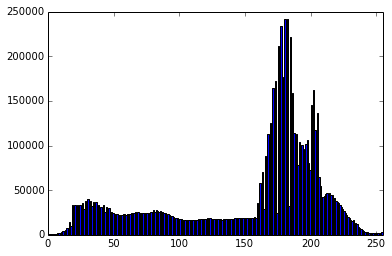

In [108]:
import matplotlib.pyplot as plt
import cv2

im = cv2.imread('test1.jpg')
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

#### Part 6: Compute the entropy for each one of the predictors in the previous exercise. Which predictor will compress better?